TODO:
    
    - Test get data code from module ... done.
    - Develop plot function ... Done.
        - Test with projection. Done
        - Need to check why it takes too long/ frezes for James bay ... Done
    - Mutiplot funcition..done
        - Need testing the version in the module..done
    - Develope timeseries analysis
        - stats on given region .. done
            - need to test from au module .. done.
        - get list of files .. done
            - need to test from au module .. done
        - time series plot .. done
            - need to transfer to the module .. done
        - calc year average per month .. done
            - need VPN access to develope .. done. 
            - develope ..done.
        - code dev of marine heat waves .. done.
        - code dev of marine cool spells .. 
        -         
     - Transform code to class .. 
      



In [1]:

# Data related libraries
import numpy as np
import netCDF4 as nc
import pandas as pd
import datetime

# Project custom made libaries
import anha4_utils as au

# Plotting related libraries
import matplotlib
#%matplotlib nbagg    # for interactive ploting
import matplotlib.pyplot as plt
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#import cartopy
#import cartopy.crs as ccrs
from cartopy import crs as ccrs, feature as cfeature
import seaborn as sns

#from mpl_toolkits.axes_grid1 import make_axes_locatable




# Machine specific libraries
from sys import platform
import glob
import os



------

## Testing reorganizing code as a class.


In [2]:
# Project custom made libaries
import anha4_utils as au


In [3]:
anha = au.ANHAlyze(month_list=['08'])
anha

['/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m08d03_gridT.nc']


In [4]:
anha.get_file_list(month_list=['08','04'])

['/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m08d03_gridT.nc',
 '/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m04d05_gridT.nc']

In [5]:
anha.get_file_list()

['/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m04d05_gridT.nc',
 '/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m06d04_gridT.nc',
 '/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m08d03_gridT.nc']

-------

## Testing stats, time series and other functions

In [2]:
# global variable selection.

Hudson_bay = False           # Boolean if using Hudson Bay vs James Bay locations.
depth = 0                    # z axis location from 50 unit "depth" 

if Hudson_bay: 
    hudson_east = -75
    hudson_west = -95
    hudson_north = 65
    hudson_south = 50

else:
    hudson_east = -78.5
    hudson_west = -82.5
    hudson_north = 54.7
    hudson_south = 51

lat_range  = (hudson_south,hudson_north)
lon_range = (hudson_west,hudson_east)
    
    
# File selection given platform and other parameters
if platform == "linux" or platform == "linux2":

    #Set data list params
    year= '1958'
    grid = 'T'
    month_list = ['04','05','06','07','08','09','10','11','12']

elif platform == "darwin":

    #Set data list params
    year= '1998'
    grid = 'T'
    month_list = ['04','06','08']

In [3]:
au.get_file_list()

['/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m04d05_gridT.nc',
 '/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m06d04_gridT.nc',
 '/Users/jeenriquez/Documents/CEOS/ANHA4/Test_Data/ANHA4-EPM111_y1998m08d03_gridT.nc']

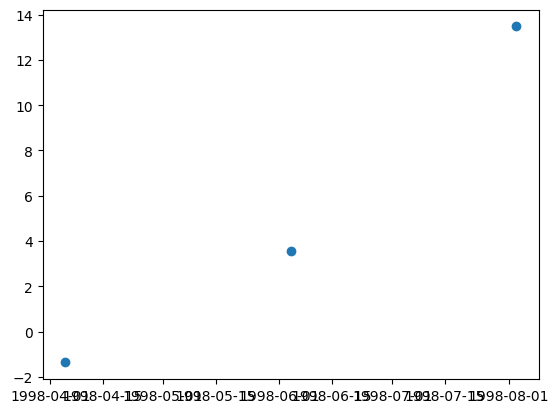

In [4]:

file_list = au.get_file_list()

var_means = []
dates = []

for filename in file_list:
    
    # Get Anha4 data
    data = nc.Dataset(filename)

    # Calculate var_data mean
    var_mean, var_std = au.calc_stats_var_data(data,lat_range,lon_range)

    # Save date from filename
    date = filename.split('/')[-1].split('_')[1]
    date = datetime.date(int(date[1:5]),int(date[6:8]),int(date[9:11]))
    
    var_means.append(var_mean)
    dates.append(date)
    

timeseries_var = pd.DataFrame({'date':dates,'var_mean':var_means})

plt.scatter(timeseries_var['date'],timeseries_var['var_mean'])
    
    

In [ ]:
timeseries_var['date'].iloc[0]

In [ ]:
#sns.set()

plt.scatter(timeseries_var['date'],timeseries_var['var_mean'])

#sns.reset_orig()

In [ ]:
timeseries_var

In [ ]:
# Testing getting and plutting timeseries data
    
file_list = au.get_file_list()

# Get timeseries
timeseries_var = au.get_timeseries(file_list,lat_range,lon_range,)

# get info for timeseries plot
data_variables = nc.Dataset(file_list[0]).variables
var='votemper'



def plot_timeseries(timeseries_var,data_variables,lat_range,lon_range,var='votemper'):
    """    """

    # Setting up seaburn defaults
    sns.set()    

    # Setting up timeseries plot
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

    # Plotting data with error bars
    ax.errorbar(timeseries_var['date'],timeseries_var['var_mean'], yerr=timeseries_var['var_std'],fmt='o')

    # Labels 
    ax.set_ylabel('%s [%s]'%(data_variables[var].long_name.title(),data_variables[var].units))
    ax.set_xlabel('Time')
    ax.set_title('Mean values taken from region: Lat %s , Lon %s'%(str(lat_range),str(lon_range)))
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)

    # Returning to matplotlib defaults
    sns.reset_orig()

    
plot_timeseries(timeseries_var,data_variables,var='votemper')  
    
#plt.show()



#-----
# def format_kilos(x, pos):
#     """ Format x tick labels """
#     return '%.0fk' % (x*1e-3)

# from matplotlib.ticker import FuncFormatter
# formatter = FuncFormatter(format_kilos)

# ncols = int(np.max([np.min([3,len(sublist)]),np.ceil(np.sqrt(len(sublist)))]))
# nrows = int(np.ceil(len(sublist)/ncols))

# fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4,nrows*4+1))
    

    
# fig.axes[i].hist(masc_data[inspect_var])        
# fig.axes[i].set_xlabel(inspect_var+units)
# fig.axes[i].set_title(year)
# if i % ncols == 0:
#     fig.axes[i].set_ylabel('Count')
# #        ax[i].xaxis.set_tick_params(rotation=30, labelsize=10)
# fig.axes[i].xaxis.set_major_formatter(formatter)
        
        
# fig.suptitle('Crop: %i'%(crop), fontsize=16)
# plt.tight_layout()
# #plt.savefig(MASC_output_path+'MASC_reduced.crop-%i.hist-%s.png'%(crop,inspect_var))

In [ ]:
# Testing getting and plotting timeseries data
    
    
file_list = au.get_file_list()

# Get timeseries
timeseries_var = au.get_timeseries(file_list,lat_range,lon_range,)

# get info for timeseries plot
data_variables = nc.Dataset(file_list[0]).variables
var='votemper'

# plot timesries
au.plot_timeseries(timeseries_var,data_variables,lat_range,lon_range,var=var)  



In [ ]:
timeseries_var

In [ ]:
str(lat_range)

-----


## Testing plotting and other functions

In [3]:
# Get complete file list from path
file_list = au.get_file_list()

# Get Anha4 data
test_data = nc.Dataset(file_list[-1])


In [ ]:

# Get the row col ranges given lat lon ranges.
row_ranges,col_ranges = au.get_row_col_range(test_data,(hudson_south,hudson_north),(hudson_west,hudson_east))
row_ranges,col_ranges


# Get data 
data_check  = au.get_var_data(test_data,row_ranges,col_ranges,cardinal=False)


plt.imshow(data_check)



In [ ]:

# Get data 
data_check  = au.get_var_data(test_data,(hudson_south,hudson_north),(hudson_west,hudson_east))


plt.imshow(data_check)

In [ ]:

plot_var_data(test_data,(hudson_south,hudson_north),(hudson_west,hudson_east))



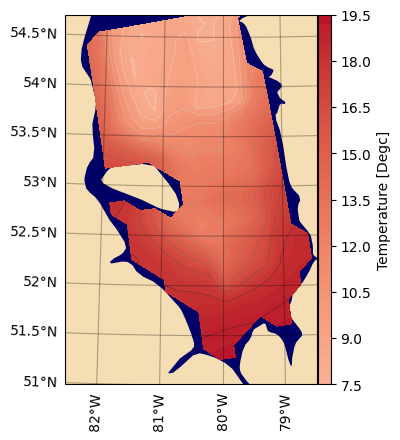

In [4]:

au.show_var_data_map(test_data,(hudson_south,hudson_north),(hudson_west,hudson_east))



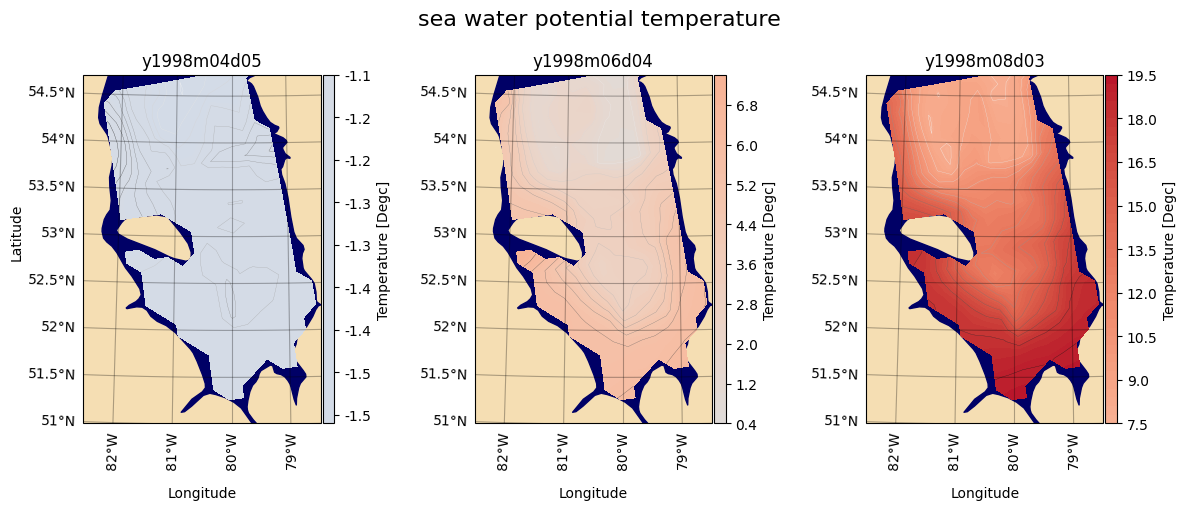

In [5]:
file_list = au.get_file_list()

au.show_var_data_maps(file_list,(hudson_south,hudson_north),(hudson_west,hudson_east))

------


#### Older tests


In [ ]:
#lat[(lat.data < hudson_north) & (lat.data > hudson_south)]

#lat.data

lat_mask = np.ma.filled((lat.data>hudson_south) & (lat.data<hudson_north) )
lon_mask = np.ma.filled((lon.data>hudson_west) & (lon.data<hudson_east) )


print(row_ranges[0],row_ranges[-1],col_ranges[0],col_ranges[-1])

#lat2.data[300:320,:20] = np.nan
lat2.data[0:col_ranges[0],:20] = np.nan

plt.imshow(lat2.data[300:500,0:200])#[y_ranges[0]:y_ranges[1],x_ranges[0]:x_ranges[1]])
plt.imshow(lat2.data[row_ranges[0]:row_ranges[-1],col_ranges[0]:col_ranges[-1]])
plt.colorbar()


In [ ]:
def find_nearest_index(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx


In [ ]:
lat[lat != 0 ].max(), lat[lat != 0 ].min()


# Lat Lon boundary on axis 
# max_lat = lat[:,0][lat[:,0] !=0].max()
# min_lat = lat[:,0][lat[:,0] !=0].min()
# max_lon = lon[0,:][lon[0,:] !=0].max()
# min_lon = lon[0,:][lon[0,:] !=0].min()

# #     lon_levels = int(abs( max_lon - min_lon ))
# #     lat_levels = int(abs( max_lat - min_lat ))   


# lat_tick_values = np.arange(int(np.ceil(min_lat)),int(np.ceil(max_lat)),int(max_lat-min_lat)//numer_of_ticks)
# lon_tick_values = np.arange(int(np.ceil(min_lon)),int(np.ceil(max_lon)),int(max_lon-min_lon)//numer_of_ticks)

# # Find indices with no zeros 
# #     lat_valid_index = lat[:,0].nonzero()[0]
# #     lon_valid_index = lon[0,:].nonzero()[0]

# # Calculate the tick values 
# lat_tick_indices = np.array([find_nearest_index(lat[:,0],val) for val in list(lat_tick_values) ])
# lon_tick_indices = np.array([find_nearest_index(lon[0,:],val) for val in list(lon_tick_values) ])


In [ ]:
def get_data(filename,row_range,col_range,depth=0, var = 'votemper'):
    """  Getting Data Latitude and Longitude """
    
    # Get data
    data = nc.Dataset(filename)
    temp = data[var][:]

    # Extracting data given lat-lon selection and depth
    temp = temp[0,depth,row_range[0]:row_range[1],col_range[0]:col_range[1]]

    return temp
        
    
def get_row_col_range(data,lat_range,lon_range):

    # Get all lat-lon data
    lat = data['nav_lat_grid_T'][:]
    lon = data['nav_lon_grid_T'][:]

    # Create mask given lat lon values.
    lat_mask = np.ma.filled((lat.data>lat_range[0]) & (lat.data<lat_range[1]) )
    lon_mask = np.ma.filled((lon.data>lon_range[0]) & (lon.data<lon_range[1]) )
    
    # Apply masks to data
    mask = lat
    mask[~(lat_mask & lon_mask )] = 0

    # Find the row,col range by collapsing each axis.
    row_ranges = np.where(mask.data.sum(axis=1) > 0)[0]
    col_ranges = np.where(mask.data.sum(axis=0) > 0)[0]

    # Select range
    row_ranges = (row_ranges[0],row_ranges[-1])
    col_ranges = (col_ranges[0],col_ranges[-1])
    
    return row_ranges,col_ranges
    

In [ ]:

def get_feature_mask(feature = 'land',resolution='50m'):
    """   """

    # Select facecolor
    if 'land' in feature:
        facecolor = matplotlib.colors.to_hex('wheat')
    elif 'ocean' in feature:
        facecolor = '#000066'
    else:
        facecolor = matplotlib.colors.to_hex('gray')        
    
    # Construct feature mask    
    feature_mask = cfeature.NaturalEarthFeature('physical',feature,
        scale=resolution,edgecolor='face',facecolor=facecolor)

    return feature_mask
    
    
def plot_var_data(data,lat_range,lon_range,depth=0):
    """  """

    # Get var data
    var_data = au.get_var_data(data,lat_range,lon_range,depth=depth)    
    
    # Get mask
    surf_mask = au.get_mask(data,lat_range,lon_range,depth=depth)

    # Mask data
    var_data.data[~np.ma.filled((1 == surf_mask.data))] = np.nan
    surf_mask.data[np.ma.filled((1 == surf_mask.data))] = np.nan

    #getting lat and lon 
    lat, lon = au.get_lat_lon(data,lat_range,lon_range)    
        
    # Setting ploting vars.
    levels = 42

    vmax=20.
    vmin=-20.

    standard_parallels = (55,60)
    central_longitude = -80
    
    # Choosing variable to plot 
    var =  'votemper'

    # Set up plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
    ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]])
        
    # Adding ocean and land features
    ax.add_feature(get_feature_mask())
    ax.add_feature(get_feature_mask(feature = 'ocean'))
        
    # Plotting var data as filled countour regions 
    im = ax.contourf(lon,lat,var_data,levels=levels,cmap='coolwarm',
                     vmin=vmin,vmax=vmax,transform=ccrs.PlateCarree(),zorder=2)

    # Create gridline labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, 
                      y_inline=False,color='k',alpha=.3,linewidths=.01) 
    gl.right_labels = gl.top_labels = False
    
    # Set Colorbar
    axins = inset_axes(ax, width="5%", height="100%",loc='right',borderpad=-1)
    label = data.variables[var].long_name+' ['+data.variables[var].units+']'
    fig.colorbar(im, cax=axins, orientation="vertical",label=label,format='%.1f')

    